Thomas Dagier, Quentin Rod

# Exercise 3 - Linear regression optimisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

a) Read the data in separate variables for the training and test sets.

In [4]:
dataset_train.head()

,x,y
0,-1.000000,-1.859783
1,0.333333,2.768337
2,1.666667,3.246021
3,3.000000,1.784168
4,4.333333,2.175140


In [5]:
X_train = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test = dataset_test['x'].values
y_test = dataset_test['y'].values

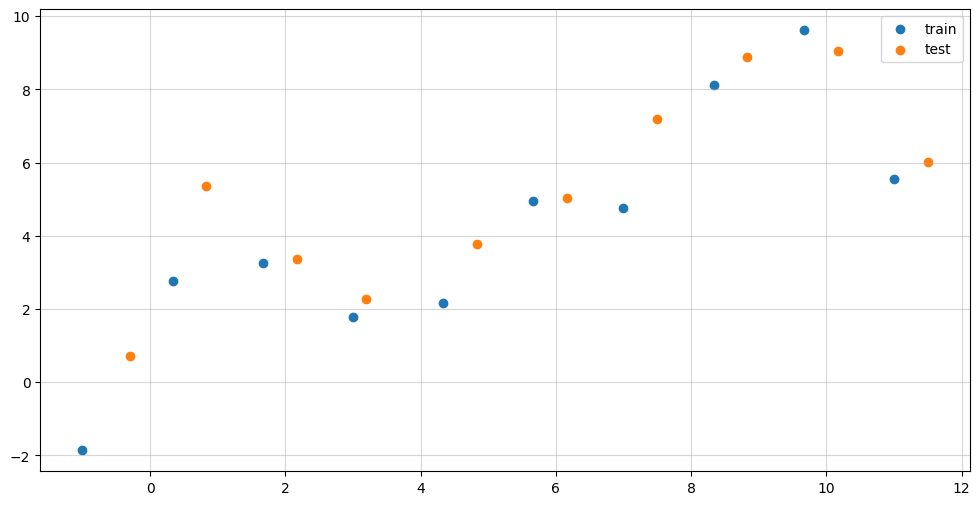

In [6]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [7]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [26]:
# TODO: implement the training method. The pseudo-code here is mostly for the normal equation. Adapt to your needs.

def train(X_train: np.array, y_train: np.array, order: float) -> np.array:
    thetas = fit(X_train, y_train, order)
    return thetas

def fit(X_train: np.array, y_train: np.array, order: float) -> np.array:

    X_design = np.ones(X_train.shape[0]) #1st column (x0) is full of 1
    for i in range(1, order + 1):
        X_design = np.c_[X_design, np.power(X_train, i)] #Add column of each power. 

    thetas = np.linalg.inv(X_design.T.dot(X_design)).dot(X_design.T).dot(y_train)

    return thetas

def predict(thetas: np.array, X: np.array) -> np.array:
    y_pred = 0
    for i in range(len(thetas)):
        y_pred += thetas[i] * X**i
        
    return y_pred

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
Order=1; cost on train set: 1.41; cost on test set: 1.68
Order=2; cost on train set: 1.35; cost on test set: 1.61
Order=3; cost on train set: 1.31; cost on test set: 1.54
Order=4; cost on train set: 0.20; cost on test set: 1.03
Order=5; cost on train set: 0.20; cost on test set: 0.98
Order=6; cost on train set: 0.14; cost on test set: 2.19
Order=7; cost on train set: 0.11; cost on test set: 4.39
Order=8; cost on train set: 0.05; cost on test set: 1.52
Order=9; cost on train set: 0.00; cost on test set: 137.78


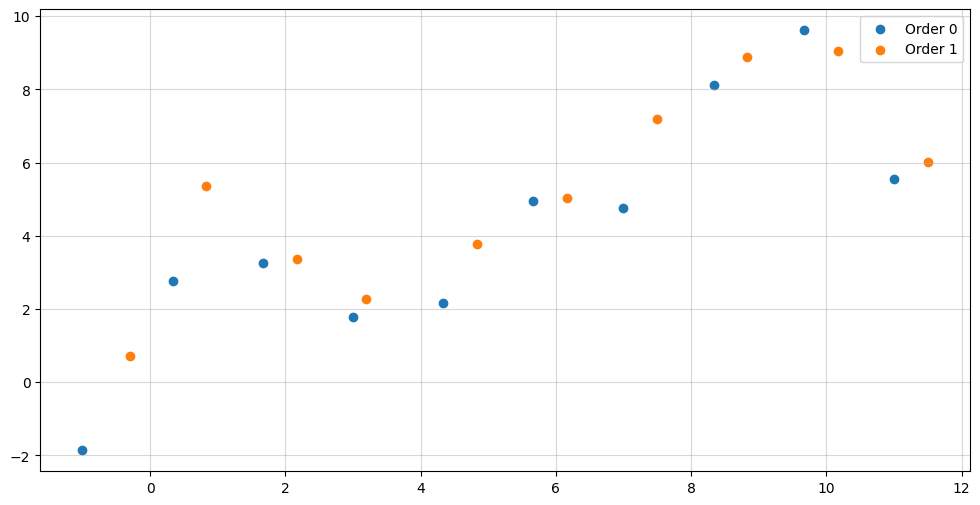

In [37]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

min_order = 1 #As the prediction formula doesn't work with order 0, we begin at 1
max_order = 9
x_axis = np.linspace(min_order, max_order, num=max_order)

train_cost_curve = []
test_cost_curve = []
for order in range(min_order,max_order + 1):
    thetas = train(X_train, y_train, order)
    
    # Test on train set
    y_pred = predict(thetas, X_train)
    cost_train = compute_cost(y_pred, y_train)
    train_cost_curve.append(cost_train)

    # Test on test set
    y_pred_test = predict(thetas, X_test)
    cost_test = compute_cost(y_pred_test, y_test)
    test_cost_curve.append(cost_test)


    print(f"Order={order}; cost on train set: {cost_train:.2f}; cost on test set: {cost_test:.2f}")
plt.legend([f"Order {i}" for i in range(10)]);

e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

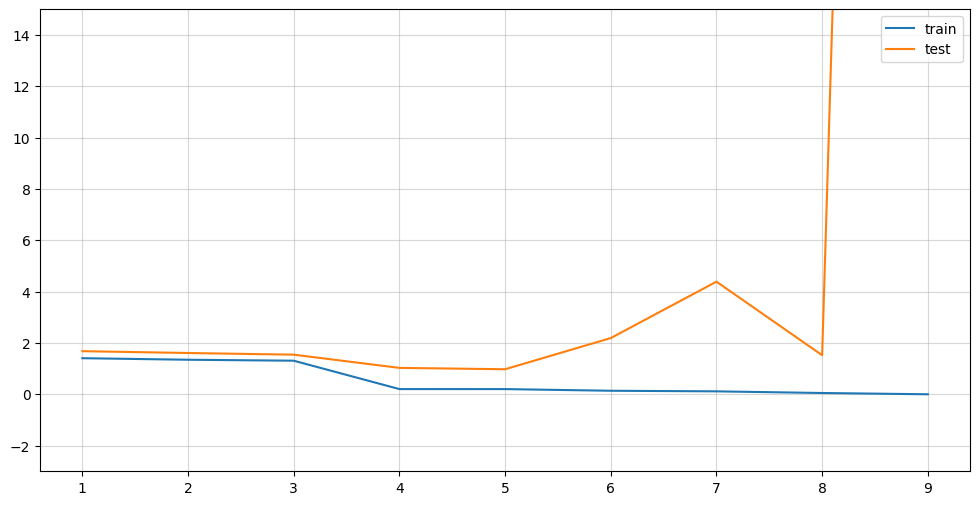

In [38]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(x_axis, train_cost_curve) #We adjust x axis as we cannot begin at order 0
plt.plot(x_axis, test_cost_curve)  #We adjust x axis as we cannot begin at order 0
plt.ylim(-3, 15)
plt.legend(['train', 'test']);

# TODO: or adapt to your own method of costs computation
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

**f) What is your best model according to these costs ? Comment your answer.**

The best model is where the test cost is minimal, so with order=5.

**g) Would you still choose the model with the lowest cost for production?**

Yes with the lowest test cost but not with the lowest train cost.

**h) Explain how under/over-fitting is involved here.**

**Over-fitting**
When the model is too strong, like with order 9, the train cost is very small but the test cost is big.

**Under-fitting**
When the model is under-fitted, test cost can be reduced. It's the case for order 1,2,3 and 4.